In [69]:
import os
import numpy as np
from tqdm import tqdm
import random
from matplotlib import pyplot as plt
GT_DATA_FILE = "/common/users/shared/double_pendulum/acrobot_u2_gt.txt"
TRAJECTORY_DATA_FOLDERS = ["/common/users/shared/double_pendulum/acrobot_real_pid_u2_lqr", "/common/users/shared/double_pendulum/acrobot_real_vel20_lqr"]

In [27]:
with open(GT_DATA_FILE, "r") as f:
    data = f.readlines()
random.shuffle(data)

In [ ]:
inputs = []
labels = []
sub_data = data[::50]
for line in tqdm(sub_data):
    line_data = line.strip().split(" ")
    line_data = np.array([float(x) for x in line_data if x != ""])
    inputs.append(line_data[:4])
    labels.append(line_data[-1])
inputs = np.array(inputs)
labels = np.array(labels)
np.min(inputs, axis=0), np.max(inputs, axis=0), np.mean(inputs, axis=0), np.std(inputs, axis=0), inputs.shape, labels.shape

  0%|          | 0/356337 [00:00<?, ?it/s]

100%|██████████| 356337/356337 [00:01<00:00, 332407.90it/s]


((356337, 4), (356337,))

In [32]:
from collections import Counter
Counter(labels)

Counter({np.float64(0.0): 351037, np.float64(1.0): 5300})

In [46]:
# len(traj_data)

traj_data = []
for folder in TRAJECTORY_DATA_FOLDERS:
    for file in tqdm(os.listdir(folder)[:10]):
        with open(os.path.join(folder, file), "r") as f:
            record = False
            all_data = f.readlines()
            traj = []
            for i, line in enumerate(all_data):
                if record:
                    traj.append([float(x) for x in line.strip().split(" ") if x != ""][:4])
                if line.strip() == "":
                    record = True
        traj_data.append(traj)
one = [float(x) for x in data[0].strip().split(" ") if x != ""][:4]
one

100%|██████████| 10/10 [00:00<00:00, 284.61it/s]


[-0.35, 0.25, 1.9, -0.4]

In [47]:
len(traj_data)

20

In [67]:
# traj_data = np.array(traj_data)
# traj_data.shape
# np.min(traj_data, axis=1), np.max(traj_data, axis=1), np.mean(traj_data, axis=1), np.std(traj_data, axis=1)
all_dp = np.vstack(traj_data)
np.min(all_dp, axis=0), np.max(all_dp, axis=0), np.mean(all_dp, axis=0), np.std(all_dp, axis=0)

(array([ -9.47821, -12.56637, -12.02792, -11.54191]),
 array([ 9.54262,  7.72675, 12.28984, 25.     ]),
 array([ 0.22626603,  0.00689254,  0.14092355, -0.00486601]),
 array([4.64045944, 5.61843788, 1.14904744, 1.60283257]))

11

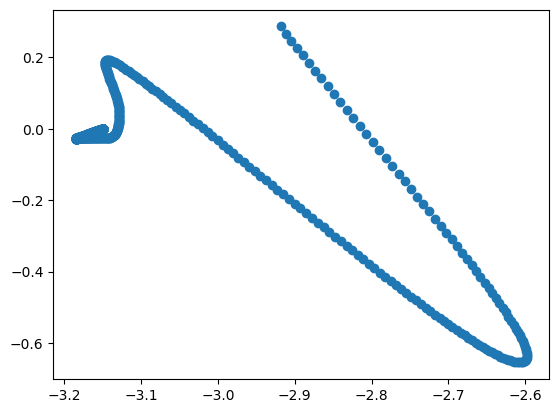

In [84]:
idx = np.random.randint(0, len(traj_data))
plt.scatter(traj_data[idx,:, 0], traj_data[idx,:, 1])
idx

In [86]:
-3 * np.pi

-9.42477796076938